In [1]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys
import re

In [2]:
cwd = os.getcwd() + "/ACC"

print(cwd)

os.chdir(cwd)

/home/jm/vscode/Python/pytorch/Fall Dectection/ACC


In [3]:
#gets data from file specified by file_path
def get_contents(file_path):
    
    time = []
    x = []
    y = []
    z = []
    
    for file in os.listdir():
        if file.endswith(".npy"):
            file_path = f"{cwd}/{file}"
            data = np.load(file_path)

            time = data[0]
            x = data[1]
            y = data[2]
            z = data[3]
                
    df = pd.DataFrame({
        'time' : time,
        'x': x,
        'y': y,
        'z': z,
    })
    
    return df

In [4]:
dataset = get_contents(cwd)

dataset

,time,x,y,z
0,0.000000,0.018494,-0.352112,-0.949310
1,0.010004,0.021927,-0.352066,-0.962875
2,0.020008,0.025452,-0.350891,-0.961868
3,0.030011,0.034027,-0.348770,-0.952286
4,0.040015,0.035278,-0.348099,-0.950531
...,...,...,...,...
5984,59.860312,0.150497,-0.443298,-1.026718
5985,59.870315,0.151566,-0.418396,-0.987000
5986,59.880318,0.108017,-0.387466,-0.922668
5987,59.890321,0.065002,-0.393784,-0.844025


## iMed Dataset

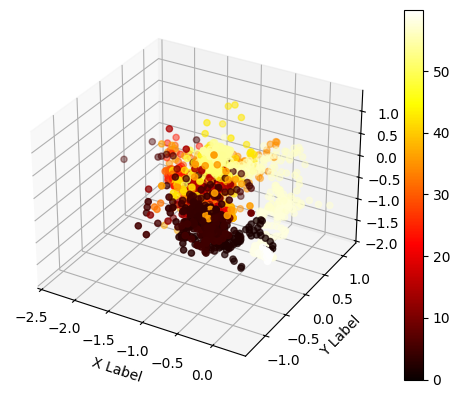

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

img = ax.scatter(dataset['x'], dataset['y'], dataset['z'], c = dataset['time'], cmap = plt.hot())
fig.colorbar(img)
plt.show()

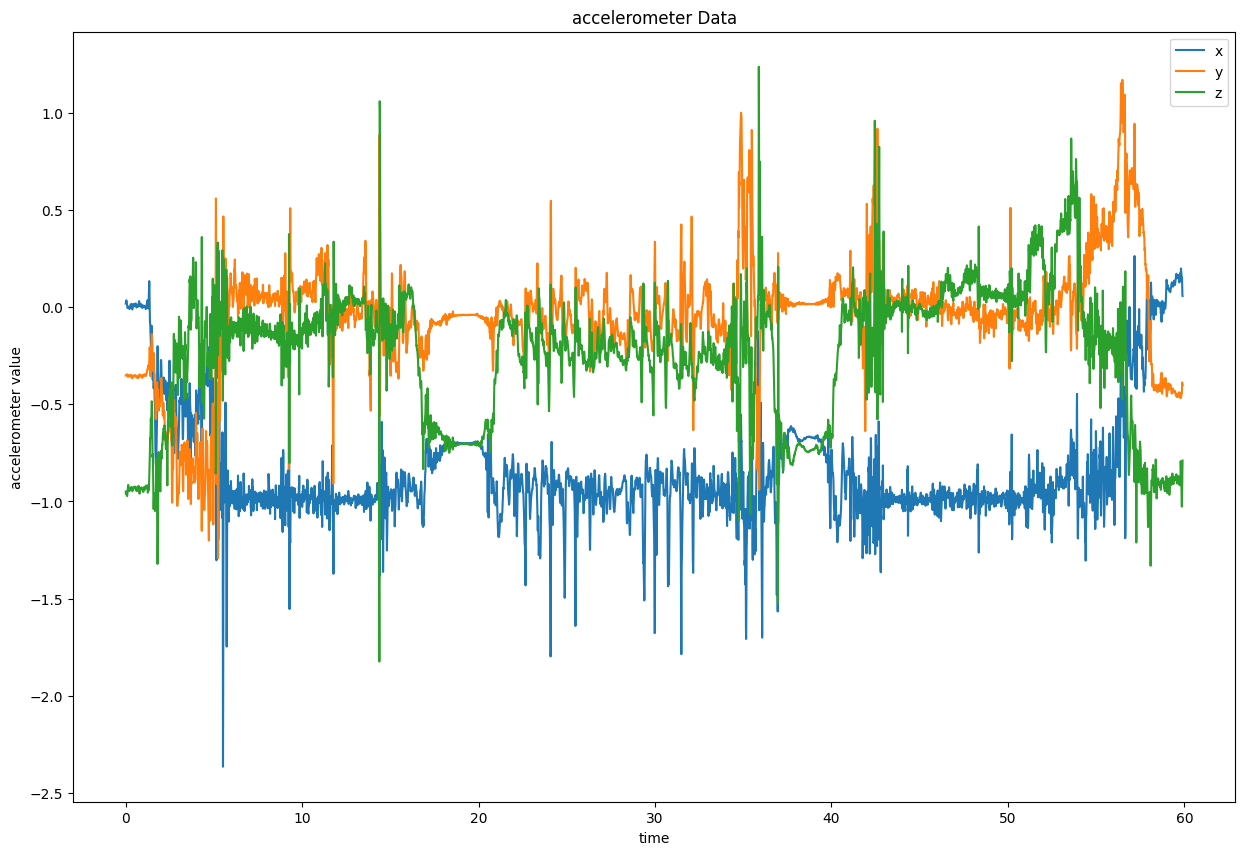

In [7]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10))

plt.plot(dataset['time'], dataset['x'], label='x')
plt.plot(dataset['time'], dataset['y'], label='y')
plt.plot(dataset['time'], dataset['z'], label='z')

plt.xlabel("time")
plt.ylabel("accelerometer value")
plt.title("accelerometer Data")

plt.legend()
plt.show()


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    5989 non-null   float64
 1   x       5989 non-null   float64
 2   y       5989 non-null   float64
 3   z       5989 non-null   float64
dtypes: float64(4)
memory usage: 187.3 KB


[]

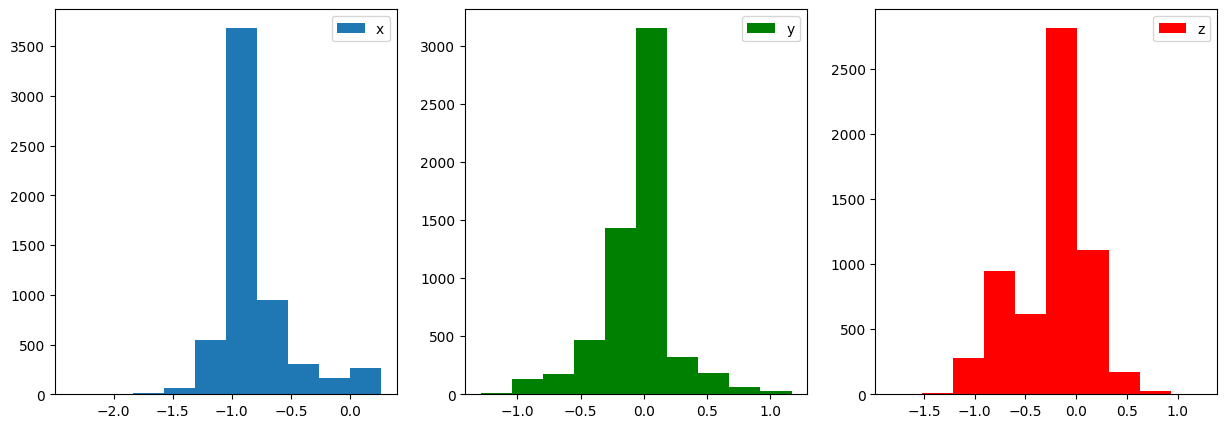

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.hist(dataset['x'], label='x')
plt.legend()
plt.subplot(1,3,2)
plt.hist(dataset['y'], color='green', label='y')
plt.legend()
plt.subplot(1,3,3)
plt.hist(dataset['z'], color='red', label='z')
plt.legend()
plt.plot()